In [1]:
from BLEanalysis.pathinference import Path
from BLEanalysis.kernels import ExponentiatedQuadraticKernel as EQKernel
from BLEanalysis.synthetic import SimpleDemo

2025-04-28 08:57:41.913893: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745827061.931381   17500 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745827061.936262   17500 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745827061.948986   17500 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745827061.949003   17500 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745827061.949005   17500 computation_placer.cc:177] computation placer alr

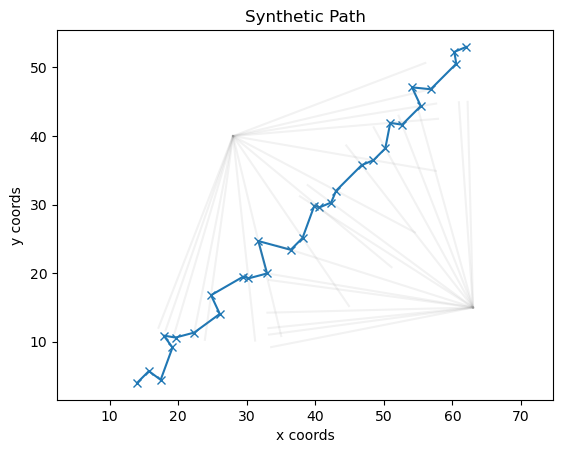

In [2]:
demo = SimpleDemo()
demo.plot()

In [6]:
inferredPath = Path(demo.obstimes, demo.observations, kernel = EQKernel(lengthscale = 5,scalefactor = 50), 
                    noiseScale=0.2, numberOfInducingPoints=7)
inferredPath.run(400,0.3)


At iteration:      0, loss is:    609699
At iteration:     50, loss is:    207752
At iteration:    100, loss is:     57539
At iteration:    150, loss is:     15960
At iteration:    200, loss is:      6599
At iteration:    250, loss is:      4319
At iteration:    300, loss is:      3536
At iteration:    350, loss is:      3158
Training successful!


In [19]:
mu, cov = inferredPath.predict(Xs=inferredPath.selectPoints(100,margin=1))

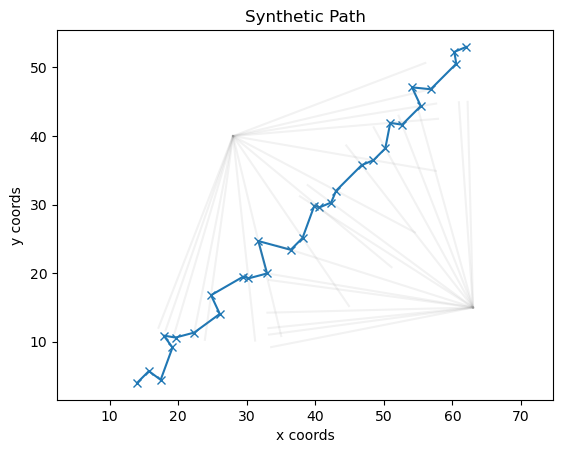

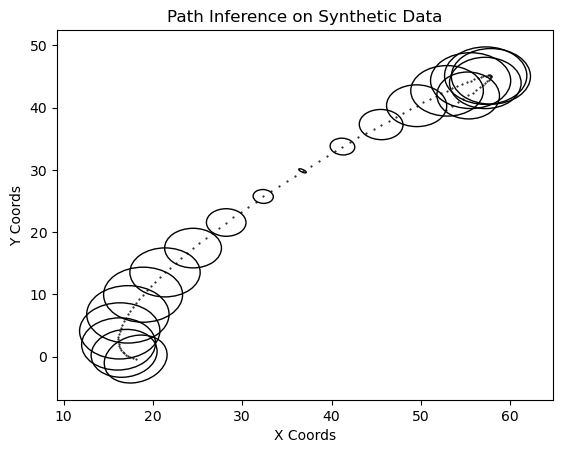

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from BLEanalysis import confidence_ellipse
demo.plot()

ax = plt.gca()
for i,(m,c) in enumerate(zip(mu.numpy(),cov.numpy())):
    std = max(np.sqrt(c[0,0]),np.sqrt(c[1,1]))
    ax.plot(m[0],m[1],'.k',markersize=1)

    if i%5==0:
        el = confidence_ellipse(m[:2],c[:2,:2],ax)
        ax.add_patch(el)
plt.xlabel("X Coords")
plt.ylabel("Y Coords")
plt.title("Path Inference on Synthetic Data")
plt.show()